In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_filename = ""
if csv_filename:
    df = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_run = max(list_of_files, key=os.path.getctime)
    df = pd.read_csv(latest_run + "/runs.out")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       100 non-null    object 
 1   optim      100 non-null    int64  
 2   size       100 non-null    int64  
 3   time       100 non-null    float64
 4   bandwidth  100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [3]:
def create_scatter_subplot(ax, data, optims, name, scale="linear"):
    for optim in optims:
        optim_data = data[data[:,1] == optim]
        x = np.array(optim_data[:,2], dtype=np.float32) # Get matrix sizes
        y = np.array(optim_data[:,3], dtype=np.float32) # Get execution time
        if scale == "log":
            plt.yscale("log")
        ax.scatter(x, y, label=f"-O{optim}")
        ax.legend(loc="upper left")
        ax.set_ylabel("Seconds")
        ax.set_xlabel("Matrix size")
        ax.title.set_text(name)

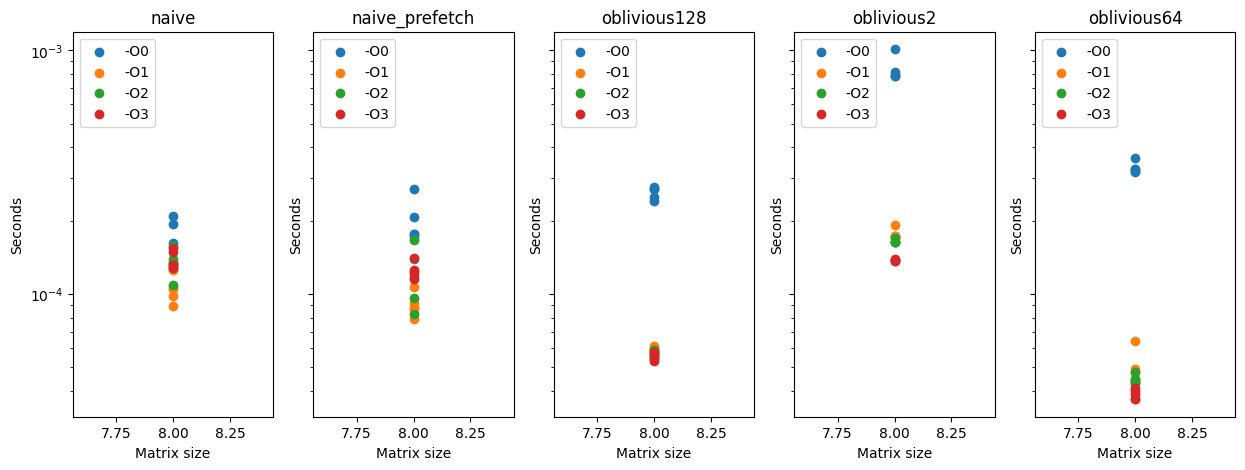

In [4]:
optims = df["optim"].unique()
names = df["name"].unique()

fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

for i, name in enumerate(names):
    data = df[df["name"] == name].to_numpy()
    create_scatter_subplot(ax[i], data, optims, name, scale="log")
plt.show()

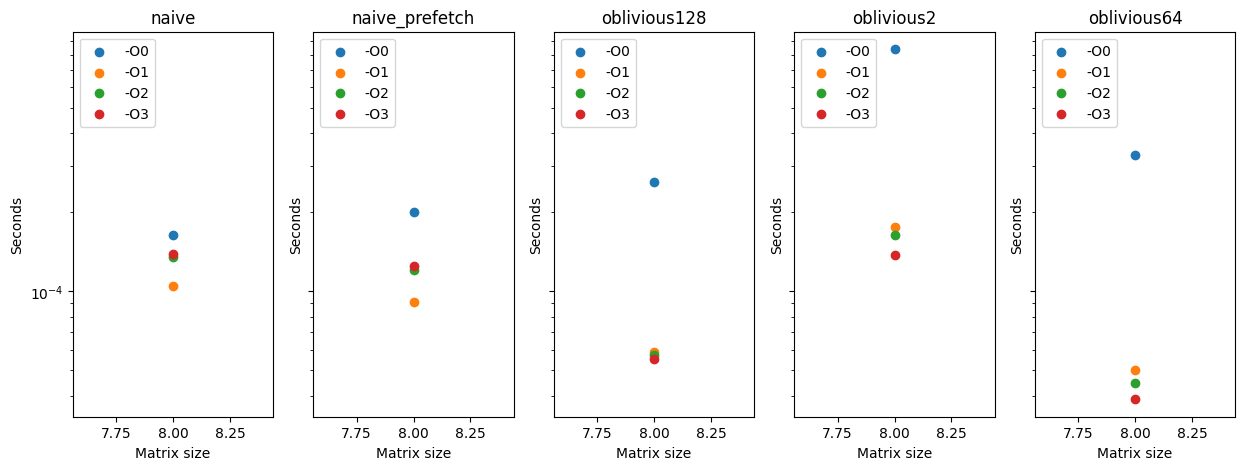

In [5]:
fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

means = df.groupby(['name', 'optim', 'size']).mean()
stds = df.groupby(['name', 'optim', 'size']).std()
for i, name in enumerate(names):
    for optim in optims:
        datapoints = means.loc[name, optim]
        x = list(datapoints.index)
        y = list(datapoints['time'])
        plt.yscale("log")
        ax[i].scatter(x, y, label=f"-O{optim}")
        ax[i].legend(loc="upper left")
        ax[i].set_ylabel("Seconds")
        ax[i].set_xlabel("Matrix size")
        ax[i].title.set_text(name)
plt.show()

In [6]:
optim_lvl = 3
means.loc['oblivious64', optim_lvl]

,time,bandwidth
size,,
8,0.000039,13.535577
